## Initial Setup

In [1]:
import tempfile
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import subprocess
from utils.competition import experiment
import pymatgen
from pymatgen.core import Composition, Element

pd.set_option('display.max_rows', 500)
exp = experiment()

## Setup the target value (execute once only)

In [2]:
target_value = 2.534 # [eV]
exp.set_target(target_value)

We've set the target value as 2.534[eV]. Now let's begin exploration!


## Search database: prior information

In [3]:
df_prior = exp.set_search_table()

,indirect_bandgap (eV),crystal_name,_cell_length_c,_cell_length_b,_cell_length_a,_cell_angle_gamma,_cell_angle_beta,_cell_angle_alpha
2718,0.3949,Co2Li3MgO6,14.315863,2.841961,2.841961,120.001942,89.999554,90.000438
5416,1.4837,Al22B9Fe4LiNa2O93Si18,6.607903,15.079691,15.093138,120.014103,89.893818,89.954486
692,0.3635,Fe5Li6Mn13O32,7.656256,7.602826,7.628490,89.530985,90.041728,91.154881
5464,0.3677,Al10Ca6Li2,14.641756,5.489625,5.696220,119.711479,103.667063,81.948827
986,0.5077,Ge12Li7O32Zn5,7.827259,7.827626,7.823199,89.945711,89.946591,90.069971
2606,0.8937,Fe2LiMo4NaO16,7.064026,7.200058,6.670797,106.635393,110.739455,90.272567
114,3.6155,Ge4Li14O16Zn,4.742480,5.879496,10.164132,90.250497,90.560851,89.735989
1238,0.9603,Ge2Li21P4S24,12.157662,8.316940,8.450391,89.605162,90.331458,90.824568
2592,0.3920,Al2Li17Si6,12.050182,6.483753,5.760020,88.169256,91.158142,89.832655
2796,0.8780,Cs2F4LiMg5O20Si8,10.966959,9.153847,5.288987,90.000020,99.315828,89.999971


## Search database: by element
You can put element symbols into **inclusive_query** as list. Then you can get the material name list that includes the element you've put in the query.<br>
On the contrary, if you put element symbols into **exclusive_query** as list, you'll get the material name list that excludes the element you've put in the query.<br>
If you want not to specify the element, then put none list like []

In [4]:
inclusive_query = ['Li']
exclusive_query = ['S', 'O']

df_query = exp.search_atoms(inclusive_query, exclusive_query)

1147 data was found in the database to be explored.


,crystal_name,_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma
1,Cl12InLiMn2,5.696402,11.349194,5.816324,90.000047,101.947780,89.999160
25,Li10P4Zn,5.637409,5.637403,5.637406,89.982925,90.016915,89.982978
26,Li7P4Zn2,5.660569,5.628479,5.628488,89.665619,90.000067,89.999809
27,Li8P4Zn,5.594260,5.594260,5.594272,89.837905,89.837907,89.837378
46,Ge73Li340Si7,17.362056,17.362487,17.361980,90.000243,89.998677,89.999322
...,...,...,...,...,...,...,...
6175,Br32Li20Mn9,10.391734,10.437325,10.402100,90.132456,90.498909,90.383297
6176,B307Li24,10.845118,10.865508,23.684028,90.191128,89.812940,119.955335
6177,B112Li30,10.703402,10.724677,8.898256,89.853535,90.143899,89.928431
6207,Al9Ca6Li3,5.434834,5.434563,16.048416,89.068506,90.999478,119.643545


## Search database: by characteristic values
Sort the searched results<br>

#### 1. search by electronegativity
If you want to search on the prior dataset, then put **df=df_prior**. Or if you want to search on the database that you've narrowed down in the above execution, then put **df=df_query**. Sort_by=**True** is ascending, and **False** is descending.

In [5]:
exp.search_by_electronegatvity(df=df_prior, sort_by=False)

,crystal_name,electronegativity
86,F12Li2Ni4,3.18667
20,F24In4Li7Zn,3.0875
52,Li3O48P12V8,2.92085
5,Fe2LiMo4NaO16,2.88542
49,Fe3LiMnO16P4,2.8728
50,AlLiNa6O72P18Ti11,2.86431
31,Gd4Mo4O16,2.85333
24,Co11Li5Mo12O48,2.85026
34,Al20B9Fe4Mn3NaO93Si18,2.82149
1,Al22B9Fe4LiNa2O93Si18,2.80577


#### 2. search by atomic fraction
Specify the element by putting like **element='Li'**<br>
The df and sort_by is the same as the above.

In [6]:
exp.search_by_atomin_fraction(element='Li', df=df_prior, sort_by=True)

,crystal_name,atomic_fraction
55,Ba2O14Pr4Ru4,0
43,CaF2Fe2Mg6Mn2Na5O46Si16,0
63,Al19Fe2MgO48Si7,0
67,Al20B9FFe3Mg4Na3O92Si18,0
68,Ca17Ce3O48Si12Sr4,0
34,Al20B9Fe4Mn3NaO93Si18,0
31,Gd4Mo4O16,0
26,Al3Ca3F3Fe4Mg6Na2O45Si13,0
81,Mn15O32Zn9,0
16,AlCa2F3Fe5Mg3Mn2Na2O45Si15,0


## Detailed search: display the details of the searched material
Specify the crystal_name, then detailed information will be displayed.
Be careful to type the exactly same name displayed in the previous searched table.
If you do not specify the name, randomly picked information will be displayed.

In [7]:
crystal_name = 'La5LiO24Ti8'
exp.show_details(crystal_name)

chemical formula: LiLa5Ti8O24
valence: defaultdict(<class 'float'>, {'La3+': 5.0, 'Li+': 1.0, 'O2-': 24.0, 'Ti4+': 8.0})
average electronegativity: 2.667368421052632
atomic fraction:
La: 0.13157894736842105
Li: 0.02631578947368421
O: 0.631578947368421
Ti: 0.21052631578947367


## Virtual experiment
Put the crystal name you think "this is it!".<br>
Then the answer of bandgap value will be returned.<br>
This trial will be recorded and counted as one time, so be careful what you wish for execution.

In [8]:
crystal_name = 'La5LiO24Ti8'
exp.show_answer(crystal_name)

The number of trials: 1
The chosen material：La5LiO24Ti8 and its bandgap is 1.8848 [eV]


## Confirm the trial history
You can check the trial history.<br>
The upper figure is the history of selected banggap values<br>
The lower figure is the history of the absolute error between the target value and the selected materials' bandgaps<br>

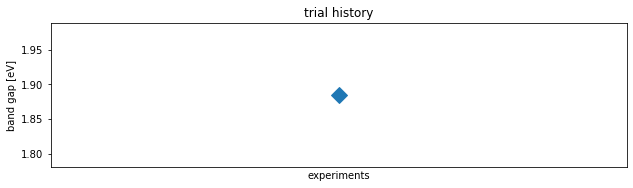

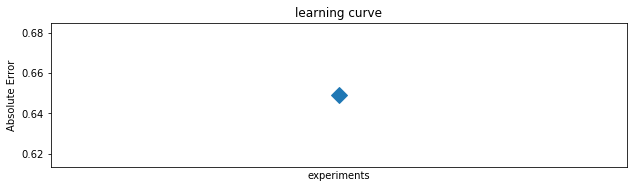

,crystal_name,bandgap [eV],losses
0,La5LiO24Ti8,1.8848,0.6492


In [9]:
exp.show_history()